In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
#В зависимости от версии sklearn
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import scipy
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

D:\Soft\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Soft\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
games_df = pd.read_csv(r'C:\Users\Dmitry\Desktop\mlcourse.ai-master\Individual\vgsales.csv')
games = games_df.head(1000)

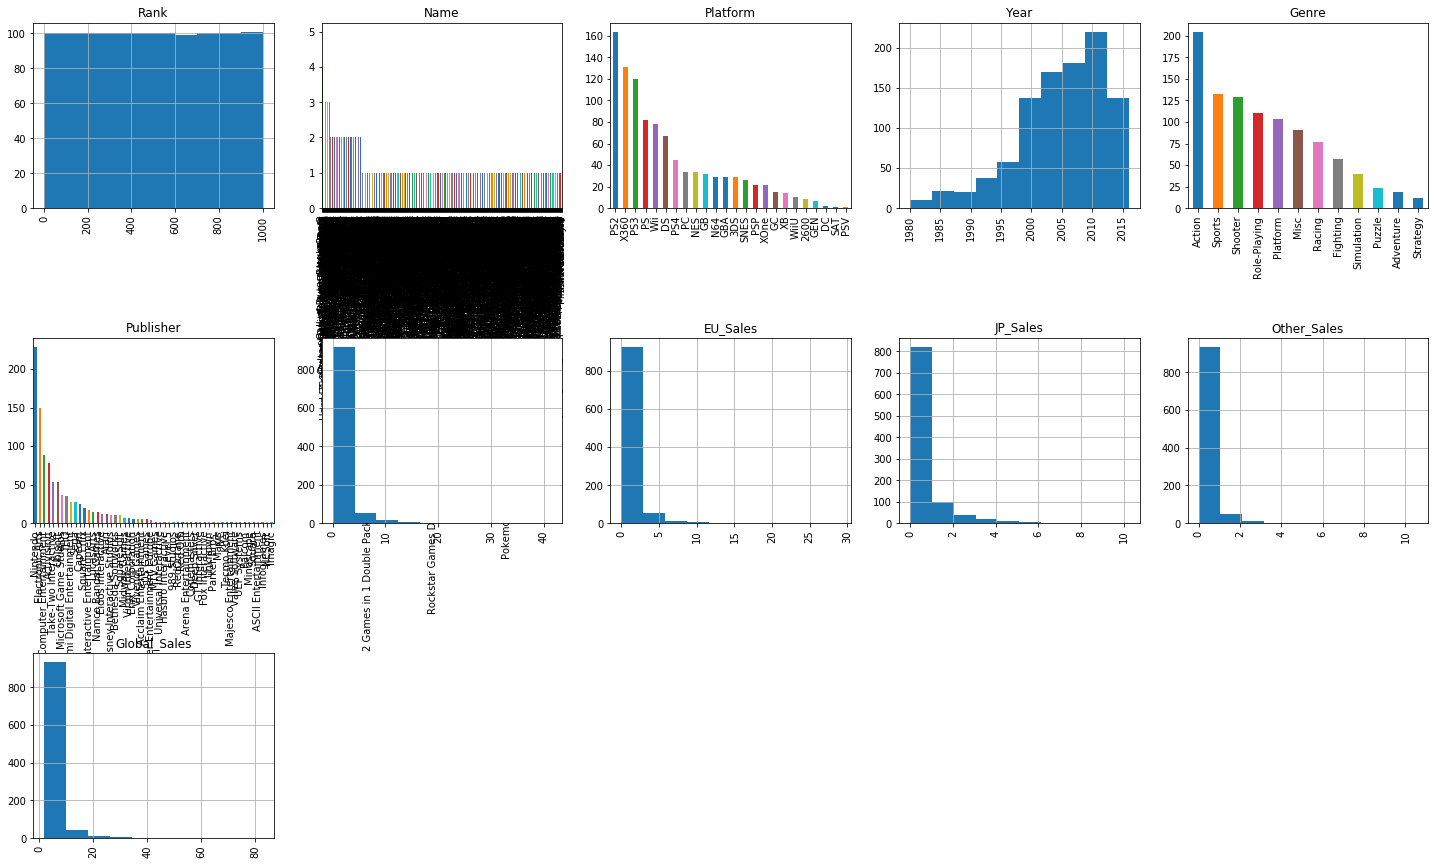

In [3]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(games.shape[1]) / cols)
for i, column in enumerate(games.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if games.dtypes[column] == np.object:
        games[column].value_counts().plot(kind="bar", axes=ax)
    else:
        games[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

Согласен - графики (некоторые) вышли прям совсем не айс, но парочка годных есть, что неплохо

In [4]:
games_df[games_df['Year'] < 2000].sort_values('Year')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6317,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.00,0.00,0.27
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.00,0.00,0.24
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
4025,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.00,0.01,0.49
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
766,768,Demon Attack,2600,1981.0,Shooter,Imagic,1.99,0.12,0.00,0.02,2.13


In [5]:
games_df['Publisher'].value_counts()

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Enter

In [6]:
share = games_df[games_df['Publisher'] == 'Sega']['Genre'].value_counts(normalize=True)['Sports'] * 100
print (f'Доля спортивных игр, выпущенных компанией Sega: {round(share, 2)} %')

Доля спортивных игр, выпущенных компанией Sega: 21.13 %


In [7]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1, 
                rc = { "figure.figsize" : (25, 15), "axes.titlesize" : 10 })

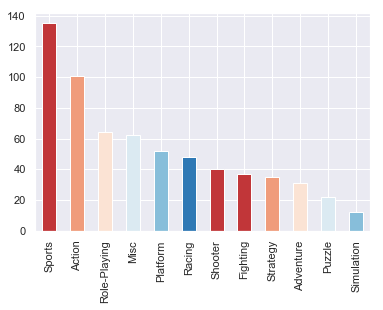

In [8]:
dateFrame=games_df[games_df['Publisher'] == 'Sega']['Genre'].value_counts()
dateFrame.plot(kind='bar', rot=90,grid=True)
dateFrame.sort_values(ascending=False, inplace=True)

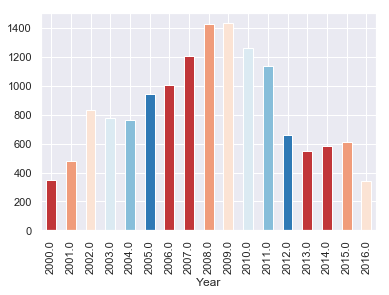

In [9]:
dateFrame=games_df[(games_df.Year>=2000) & (games_df.Year<=2016)].groupby('Year',sort=True)['Rank'].count()
dateFrame.plot(kind='bar', rot=90,grid=True)
dateFrame.sort_values(ascending=False, inplace=True)

Дальше будет обучение по 5й лабе с другим Датасетом, потому что с прежним не осилил

In [10]:
clickstream = pd.read_csv(r'C:\Users\Dmitry\Desktop\mlcourse.ai-master\Individual\clikstream_data.csv')

In [11]:
clickstream


,user_id,load_video,pause_video,play_video,seek_video,speed_change_video,stop_video
0,0,2.0,1.0,4.0,1.0,0.0,1.0
1,1,6.0,14.0,14.0,0.0,0.0,1.0
2,2,1.0,0.0,0.0,0.0,0.0,0.0
3,3,2.0,2.0,2.0,0.0,0.0,1.0
4,4,1.0,3.0,22.0,18.0,0.0,0.0
5,5,4.0,1.0,5.0,9.0,0.0,1.0
6,6,1.0,5.0,9.0,6.0,1.0,1.0
7,7,2.0,1.0,18.0,16.0,0.0,0.0
8,8,3.0,7.0,9.0,2.0,0.0,1.0
9,9,1.0,1.0,1.0,0.0,0.0,0.0


In [12]:
def get_target(x):
    if x.stop_video >= 1:
        return 1
    else:
        return 0
    
clickstream['Target'] = clickstream.apply(lambda x: get_target(x), axis = 1)

In [13]:
clickstream.dtypes

user_id                 int64
load_video            float64
pause_video           float64
play_video            float64
seek_video            float64
speed_change_video    float64
stop_video            float64
Target                  int64
dtype: object

In [14]:
## Выберем названия всех признаков из таблицы, кроме прогнозируемого

independent_columns_names = clickstream.columns.values
independent_columns_names = [x for x in clickstream if x != 'Target']
independent_columns_names

['user_id',
 'load_video',
 'pause_video',
 'play_video',
 'seek_video',
 'speed_change_video',
 'stop_video']

In [15]:
## Сделаем функцию, которая будет заменять NaN значения на медиану в каждом столбце таблицы 
def delete_nan(table):
    for col in table.columns:
        table[col]= table[col].fillna(table[col].median())
    return table   
## Применяем функцию, заменяющую все NaN значения на медианное значение соответствующего столбца
table =delete_nan(clickstream)


In [16]:
## Разделяем таргет и признаки 
X =table[independent_columns_names]
y = table['Target']


# Бутстрэп

Здесь играл с разными колонками, но особых результатов это не дало

In [17]:
def get_bootstrap_samples(clickstream, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(clickstream), (n_samples, len(clickstream)))
    samples = clickstream[indices]
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

loads = clickstream[clickstream['Target'] == 1]['play_video'].values

np.random.seed(0)

loads_mean_scores = [np.mean(sample)
                  for sample in get_bootstrap_samples(loads, 1000)]

#  выводим интервальную оценку среднего
print(stat_intervals(loads_mean_scores, 0.1))

[14.39717514 17.2507533 ]


## Подбор параметров для модели логистической регрессии 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## Используем модуль LogisticRegression для построения логистической регрессии.
## Из-за несбалансированности классов  в таргете добавляем параметр балансировки.
## Используем также параметр random_state=5 для воспроизводимости результатов
lr = LogisticRegression(random_state=17, class_weight= 'balanced')

## Попробуем подобрать лучший коэффициент регуляризации (коэффициент C в логистической регрессии) для модели лог.регрессии.
## Этот параметр необходим для того, чтобы подобрать оптимальную модель, которая не будет переобучена, с одной стороны, 
## и будет хорошо предсказывать значения таргета, с другой.
## Остальные параметры оставляем по умолчанию.
parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}

## Для того, чтобы подобрать коэффициент регуляризации, попробуем для каждого его возможного значения посмотреть 
## значения roc-auc на стрэтифайд кросс-валидации из 5 фолдов с помощью функции StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [19]:
%%time
grid = GridSearchCV(lr, parameters, cv=skf, scoring='roc_auc', n_jobs=-1)
grid.fit(X, y)
print('Оптимальное значение параметра С = {0}'.format(grid.best_params_['C']))

Оптимальное значение параметра С = 1
Wall time: 11.3 s


In [20]:
print(str(round(100 * grid.cv_results_['std_train_score'][grid.best_index_], 2)) + '%')

0.0%


:(

In [21]:
best_score = grid.best_score_

## Определение влияния признаков

In [22]:
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(C=0.001, random_state=5, class_weight='balanced')
scaler = StandardScaler()
lr.fit(scaler.fit_transform(X), y)
some_data = pd.DataFrame({'Признак': independent_columns_names,
              'Коэффициент': np.abs(lr.coef_.flatten().tolist())}).sort_values(by='Коэффициент', ascending=False)
some_data

,Признак,Коэффициент
6,stop_video,0.209959
2,pause_video,0.055755
3,play_video,0.028258
5,speed_change_video,0.027148
1,load_video,0.022626
4,seek_video,0.018936
0,user_id,0.007311


Text(0.5,1,'Важность признаков')

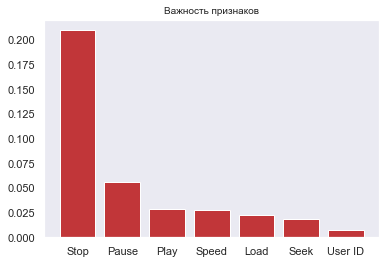

In [23]:
features = ['Stop', 'Pause', 'Play', 'Speed', 'Load', 'Seek', 'User ID']
plt.bar(some_data['Признак'], np.abs(some_data['Коэффициент']))
plt.xticks(range(7), [f for f in features])
plt.title("Важность признаков")

In [24]:
print('Доля влияния Pause_video - {0}%'.format(round((np.exp(lr.coef_[0]) / np.sum(np.exp(lr.coef_[0])))[2] * 100), 2))

Доля влияния Pause_video - 14.0%


In [25]:
lr = LogisticRegression(C=0.001, random_state=5, class_weight='balanced')
lr.fit(X, y)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=5,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
print('Увеличится на {0}%'.format(round(np.exp(lr.coef_[0][0]*20) * 100, 2)))

Увеличится на 98.42%


# Случайный лес

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Инициализируем случайный лес с 100 деревьями и сбалансированными классами 
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                            random_state=42, oob_score=True, 
                            class_weight='balanced')

## Будем искать лучшие параметры среди следующего набора
parameters = {'max_features': [1, 2, 4], 
              'min_samples_leaf': [3, 5, 7, 9], 
              'max_depth': [5,10,15]}

In [ ]:
%%time
new_grid = GridSearchCV(rf, parameters, cv=skf, scoring='roc_auc', n_jobs=-1)
new_grid.fit(X, y)

In [ ]:
print('Точность случайного леса выше на {0}%'.format(round((new_grid.best_score_  - best_score) * 100, 2)))

:(

In [ ]:
%%time
rf.fit(X, y)
feats = {
    'f1': 'Stop',
    'f2': 'Pause',
    'f3': 'Play',
    'f4': 'Speed',
    'f5': 'Load',
    'f6': 'Seek',
    'f7': 'User ID',
}
plt.bar(range(7), rf.feature_importances_)
plt.xticks(range(7), [feats['f' + str(n + 1)] for n in range(len(feats))])
plt.title('Важность признаков')

In [ ]:
min_imp = list(rf.feature_importances_).index(rf.feature_importances_.min())
print('Слабое влияние имеет признак - {0}'.format(feats['f' + str(min_imp + 1)]))

# Бэггинг

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_features': [2, 3, 4], 'max_samples': [0.5, 0.7, 0.9], 
              "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100]}

In [ ]:
%%time
bagg = BaggingClassifier(random_state=42, base_estimator=lr, n_estimators=100)
rscv = RandomizedSearchCV(bagg, parameters, n_iter=20, scoring='roc_auc', n_jobs=-1, random_state=1, cv=skf)
rscv.fit(X, y)

In [ ]:
print('Лучшая точность равна {0}%'.format(round(rscv.best_score_ * 100, 2)))

Я сделал все, что смог..